# Anjali Yadav

# Music Recommendation System (Beginner - Level)

# Import Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Reading data for train

In [2]:
train=pd.read_csv('C:/Users/USER/Downloads/train.csv')

In [3]:
train.shape

(7377418, 6)

In [4]:
train.isna().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [5]:
train.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [7]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

# Loading and Reading data for Songs

In [8]:
songs = pd.read_csv('C:/Users/USER/Downloads/songs.csv')


In [9]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [10]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [11]:
songs.shape

(2296320, 7)

In [12]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [13]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [14]:
songs.isna().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

# Loading and Reading data for members

In [15]:
members = pd.read_csv('C:/Users/USER/Downloads/members.csv')

In [16]:
members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [17]:
members.shape

(34403, 7)

In [18]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [19]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [20]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [21]:
members.isna().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

# Data Visualization

Text(0.5, 1.0, 'count plot for which source system tab using for listening music')

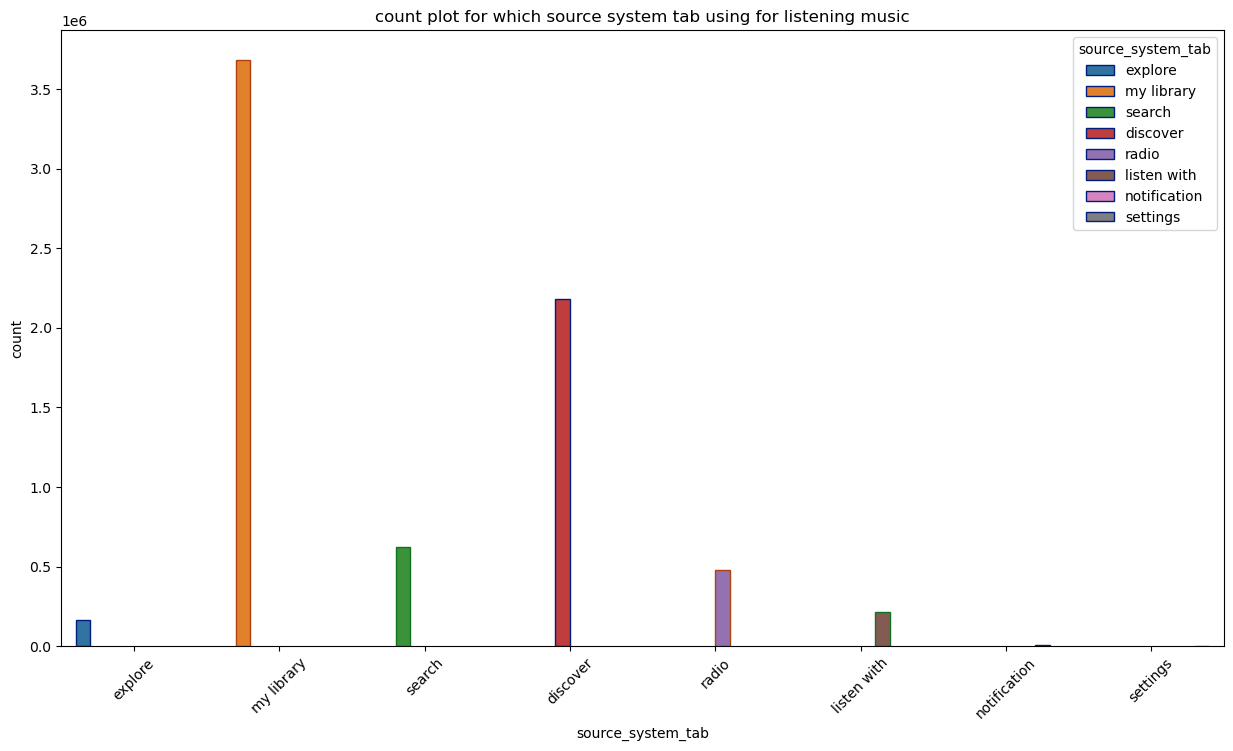

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x=train['source_system_tab'], hue=train['source_system_tab'], edgecolor=sns.color_palette('dark',3))
plt.xlabel('source_system_tab')
plt.ylabel('count')
plt.xticks(rotation='45')
plt.title('count plot for which source system tab using for listening music')

Text(0.5, 1.0, 'count plot for which screen using')

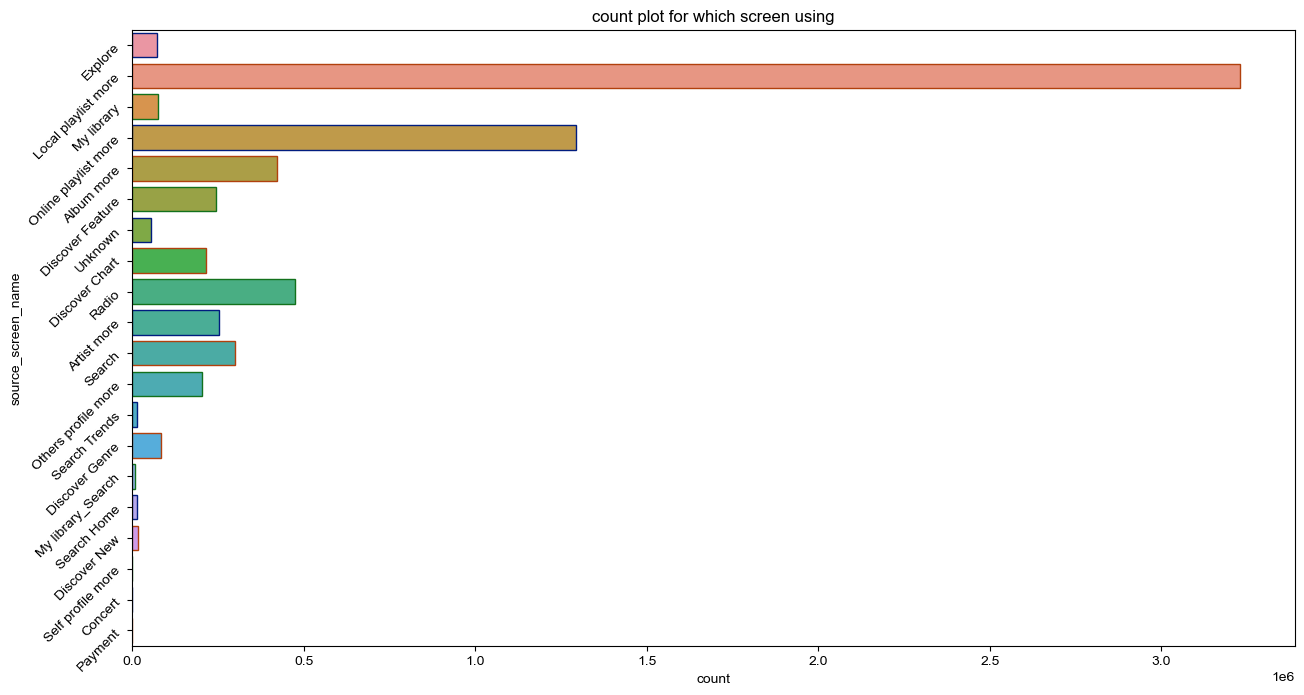

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(y='source_screen_name',data=train, edgecolor=sns.color_palette('dark',3))
sns.set(style='darkgrid')
plt.ylabel('source_screen_name')
plt.xlabel('count')
plt.yticks(rotation='45')
plt.title('count plot for which screen using')

Text(0.5, 1.0, 'count plot source types for listening music')

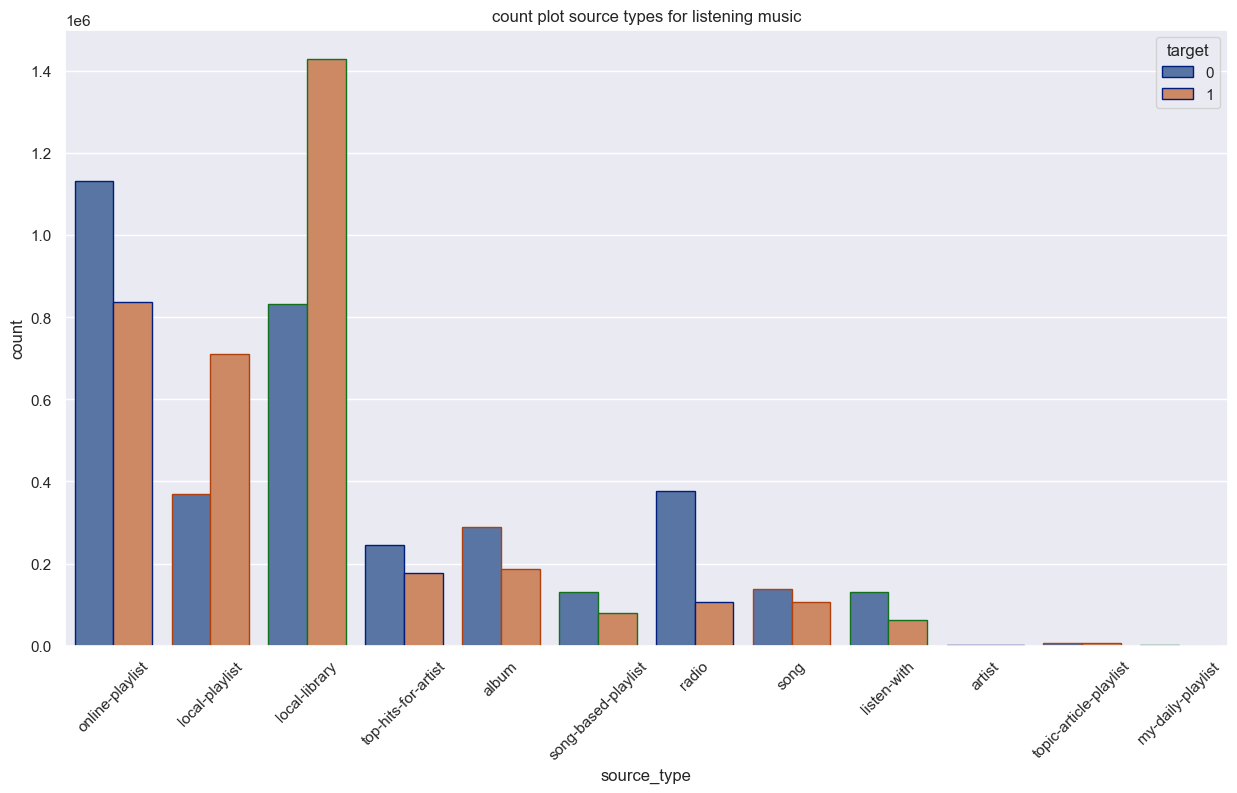

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x='source_type',hue='target',data=train, edgecolor=sns.color_palette('dark',3))
sns.set(style='darkgrid')
plt.xlabel('source_type')
plt.ylabel('count')
plt.xticks(rotation='45')
plt.title('count plot source types for listening music')

<AxesSubplot:xlabel='language', ylabel='count'>

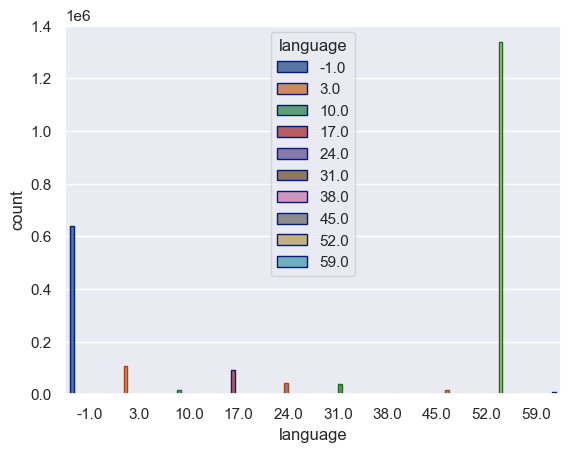

In [25]:
sns.countplot(x='language', hue='language', data=songs, edgecolor=sns.color_palette('dark',3))

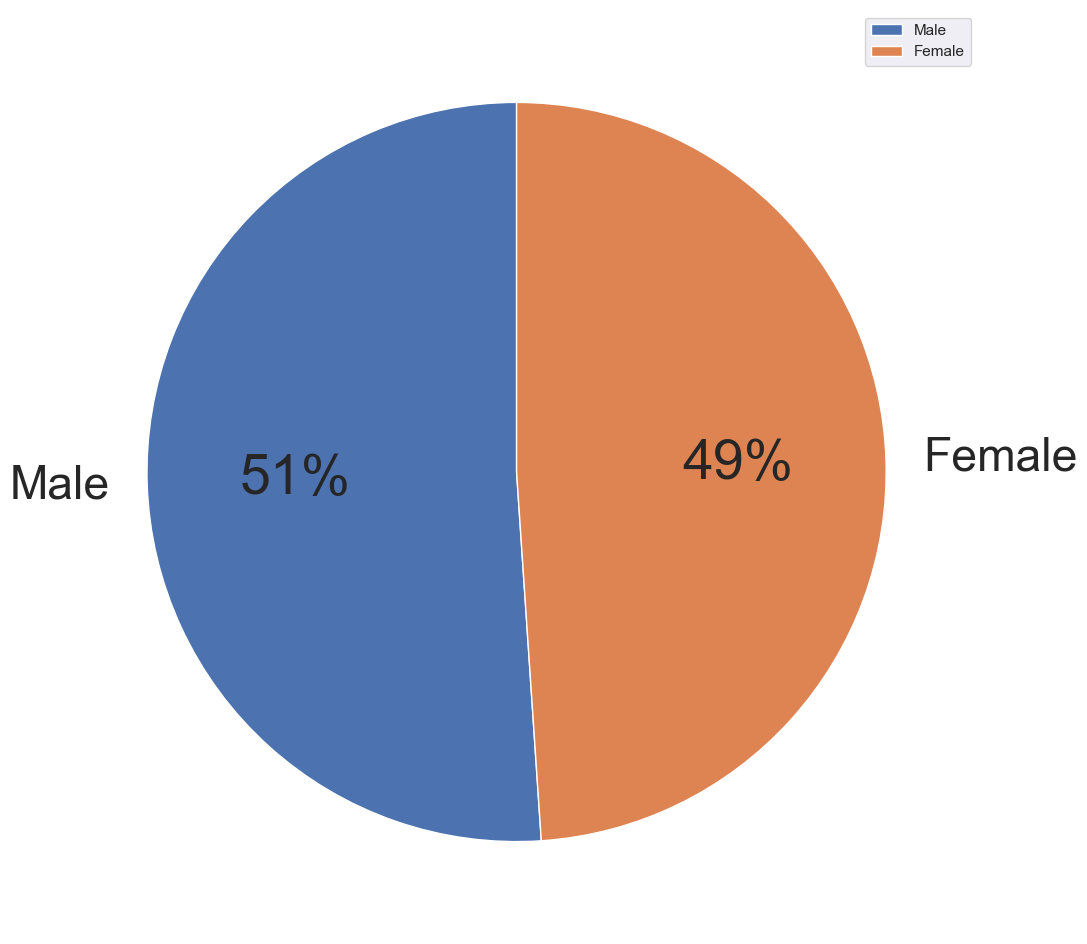

In [26]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 40.0
labels = ['Male', 'Female']
plt.figure(figsize=(12,12))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%.0f%%',
                                   shadow=False, radius=1, startangle=90)

for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()    

D:\anoconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

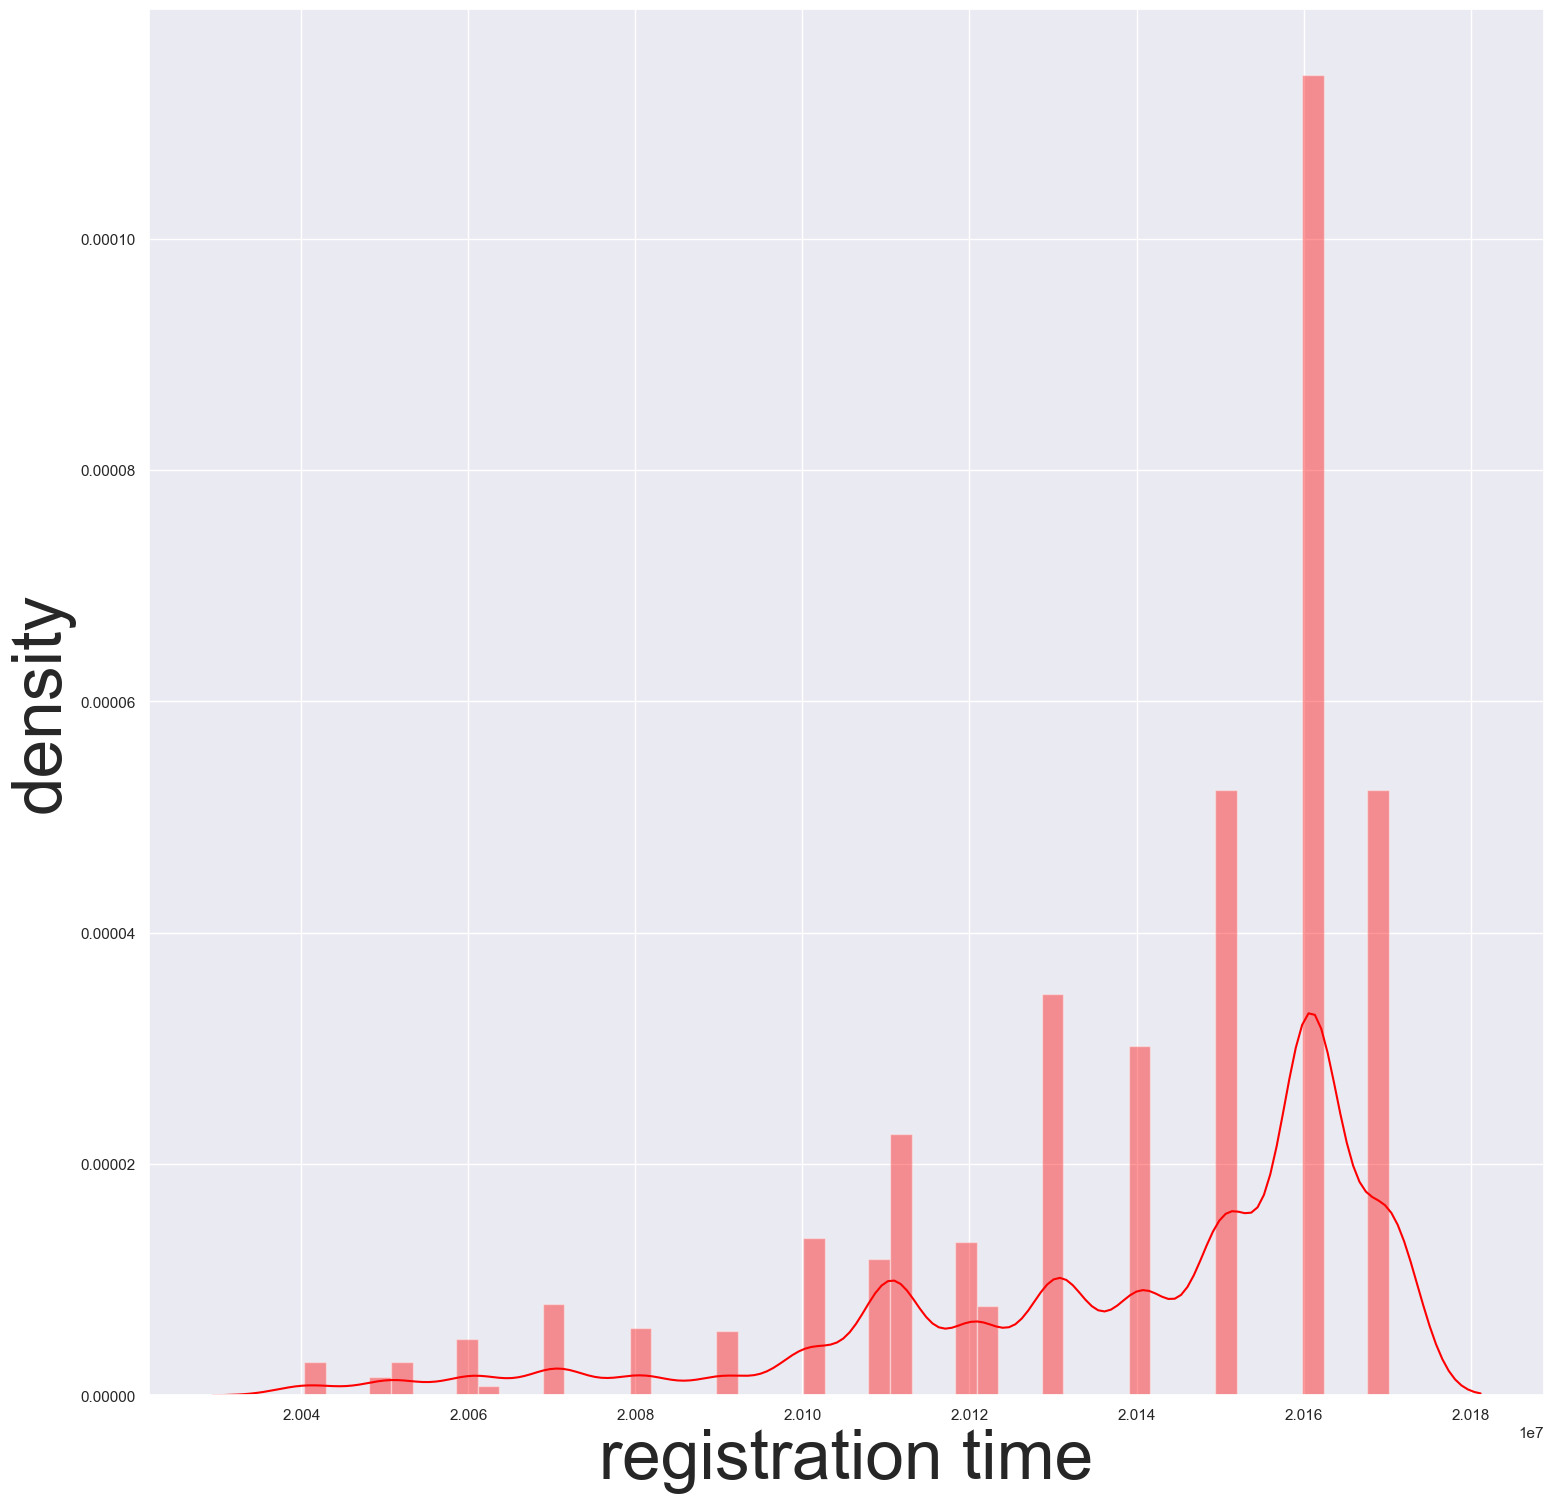

In [27]:
plt.figure(figsize=(18,18))
sns.distplot(members.registration_init_time, color='red')
sns.set(font_scale=2)
plt.xlabel('registration time', fontsize=50)
plt.ylabel('density', fontsize=50)

# Loading and Reading data for test

In [28]:
test=pd.read_csv('C:/Users/USER/Downloads/test.csv')

In [29]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [30]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [31]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [32]:
train = train.fillna(0)
test = test.fillna(0)

In [33]:
train.isna().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
artist_name               0
genre_ids                 0
song_length               0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [34]:
test.isna().sum()

id                        0
msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
artist_name               0
genre_ids                 0
song_length               0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [35]:
train.corr()

,target,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
target,1.000000,-0.001798,-0.027536,0.012114,-0.000500,0.009893,-0.002032,0.044250
song_length,-0.001798,1.000000,-0.210364,0.005189,0.004893,0.002749,-0.007419,0.004788
language,-0.027536,-0.210364,1.000000,-0.022196,-0.011337,-0.000232,0.008993,-0.004189
city,0.012114,0.005189,-0.022196,1.000000,0.400535,0.073756,-0.280728,0.152920
bd,-0.000500,0.004893,-0.011337,0.400535,1.000000,0.098428,-0.324625,0.119981
registered_via,0.009893,0.002749,-0.000232,0.073756,0.098428,1.000000,-0.443171,0.090920
registration_init_time,-0.002032,-0.007419,0.008993,-0.280728,-0.324625,-0.443171,1.000000,-0.099235
expiration_date,0.044250,0.004788,-0.004189,0.152920,0.119981,0.090920,-0.099235,1.000000


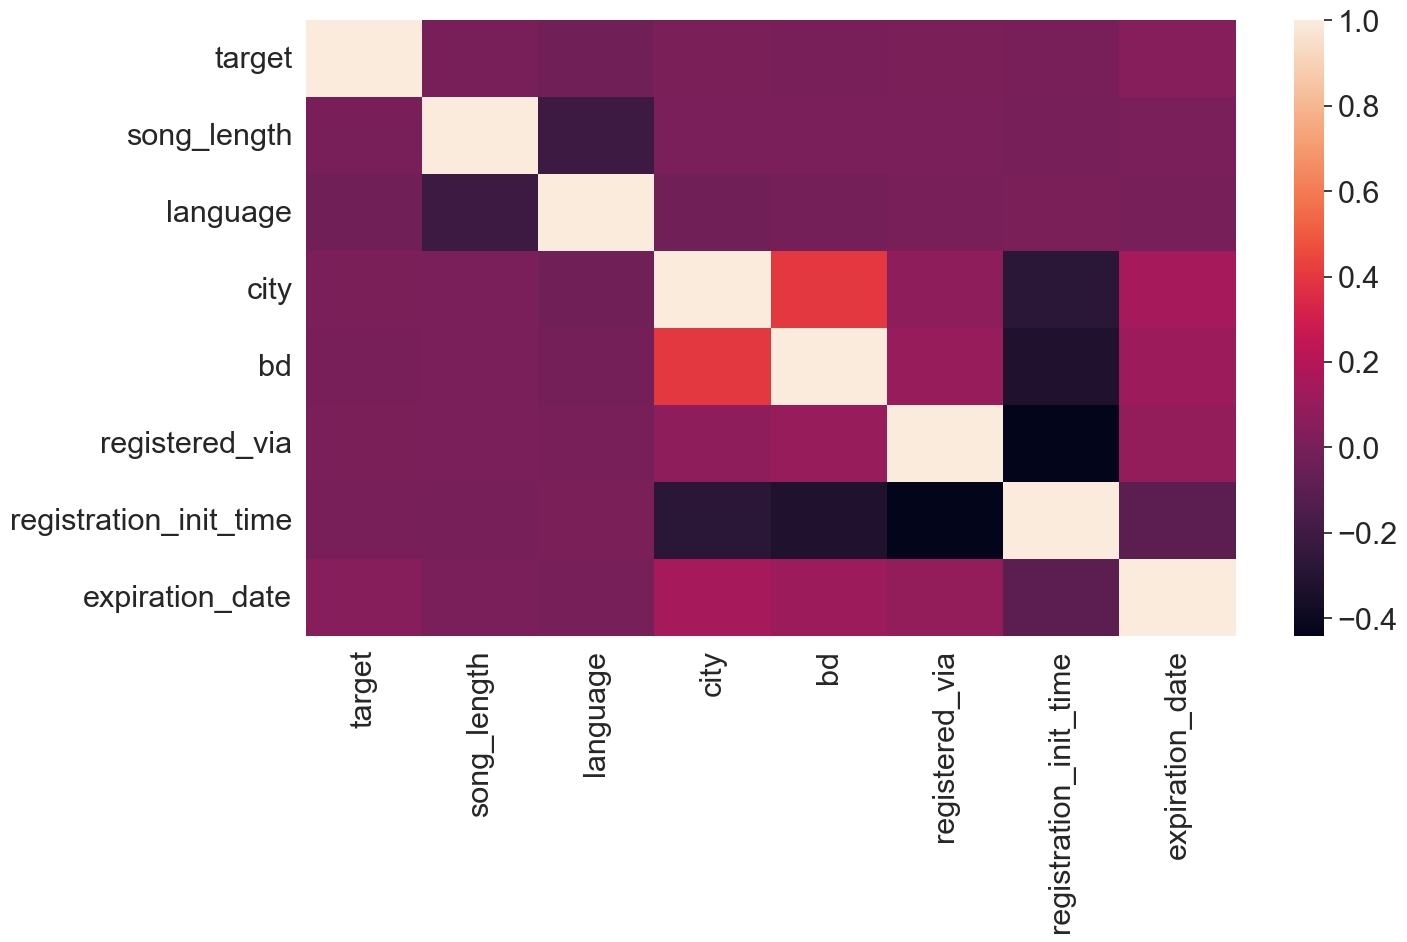

In [36]:
plt.figure(figsize=[15,8])
sns.heatmap(train.corr())
#plt.xticks(rotation='45')
#plt.yticks(rotation='30')
plt.show()

In [37]:
import gc
del members, songs; gc.collect();

In [38]:
col= list(train.columns)
col.remove('target')

In [39]:

# Object data to category
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')
    
for col in test.select_dtypes(include=['object']).columns:
    test[col] = test[col].astype('category')
    
    
# Encoding categorical features
for col in train.select_dtypes(include=['category']).columns:
    train[col] = train[col].cat.codes
    
for col in test.select_dtypes(include=['category']).columns:
    test[col] = test[col].cat.codes    

In [40]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

# Model Building

In [41]:
from sklearn.model_selection import train_test_split
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.3)

In [43]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



In [44]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [45]:
#model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [46]:
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64   1098858
           1       0.65      0.69      0.67   1114368

    accuracy                           0.66   2213226
   macro avg       0.66      0.66      0.66   2213226
weighted avg       0.66      0.66      0.66   2213226

